In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
df = pd.read_csv('placement.csv')

In [103]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [104]:
df.shape

(200, 2)

Text(0, 0.5, 'PACKAGE (IN LPA)')

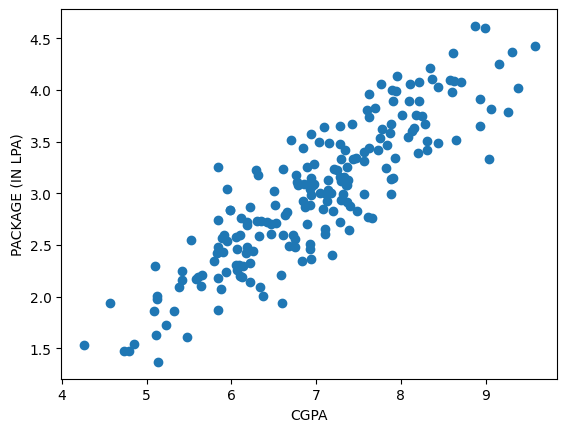

In [105]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE (IN LPA)')

In [106]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [108]:
X_train.shape

(160, 1)

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
model.fit(X_train,y_train)

LinearRegression()

In [111]:
model.predict(X_test.iloc[0].values.reshape(1,1)) #SAR-> DataFrame.series_column[0].arrays.reshape(total row, feature)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

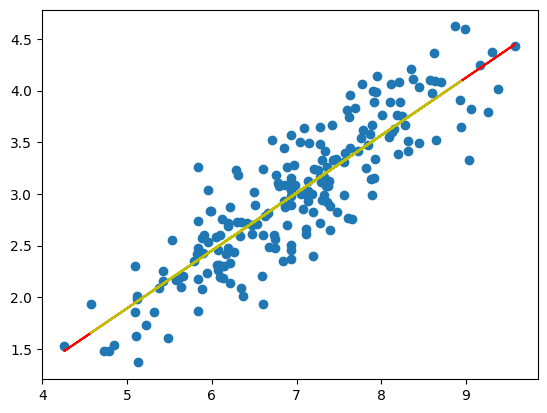

In [112]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, model.predict(X_train), c='r')
plt.plot(X_test, model.predict(X_test), c='y')


Text(0, 0.5, 'PACKAGE (IN LPA)')

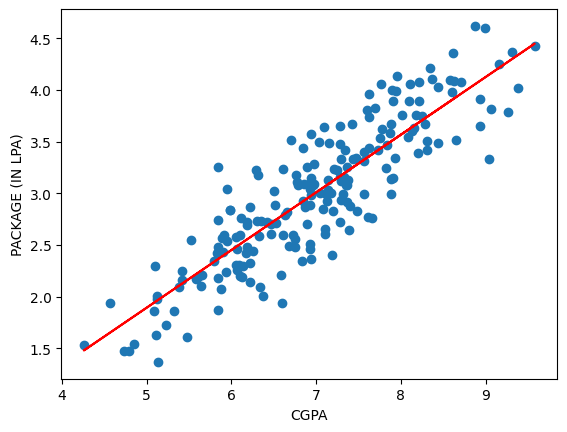

In [113]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, model.predict(X_train), c='r')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE (IN LPA)')

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
y_pred = model.predict(X_test)

In [116]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [117]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)} LPA")
print(f"MSE: {mean_squared_error(y_test,y_pred)} LPA")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} LPA")
print(f"R2: {r2_score(y_test,y_pred)} LPA")

MAE: 0.2884710931878175 LPA
MSE: 0.12129235313495527 LPA
RMSE: 0.34827051717731616 LPA
R2: 0.780730147510384 LPA


In [118]:
#Adjusted r2_score
r2 = r2_score(y_test,y_pred)
X_test.shape


(40, 1)

In [119]:
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))

In [120]:
adj_r2

0.7749598882343415

In [121]:
# Random colums adding then checking the adj_r2

In [122]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)


In [123]:
new_df1

,cgpa,package,random_feature
0,6.89,3.26,0.672582
1,5.12,1.98,0.856493
2,7.82,3.25,0.625735
3,7.42,3.67,0.519137
4,6.94,3.57,0.624414
...,...,...,...
195,6.93,2.46,0.114976
196,5.89,2.57,0.535975
197,7.21,3.24,0.366158
198,7.63,3.96,0.507106


In [124]:
new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.672582,3.26
1,5.12,0.856493,1.98
2,7.82,0.625735,3.25
3,7.42,0.519137,3.67
4,6.94,0.624414,3.57


Text(0, 0.5, 'Package(in LPA')

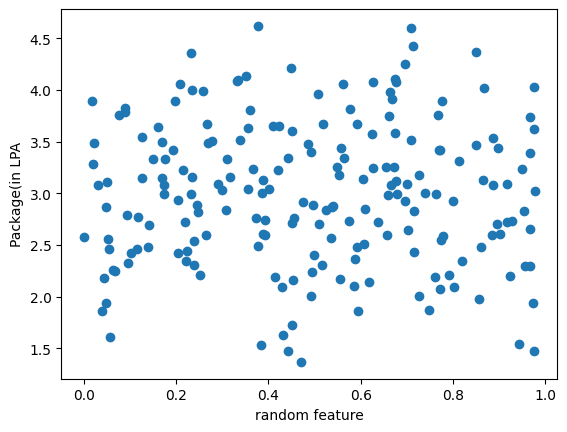

In [125]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random feature')
plt.ylabel('Package(in LPA')

In [126]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [127]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [128]:
model = LinearRegression()

In [129]:
model.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred = model.predict(X_test)

In [135]:
print(f"R2: {r2_score(y_test,y_pred)} LPA")

R2: 0.7806797996907178 LPA


In [136]:
r2 = r2_score(y_test,y_pred)
X_test.shape

(40, 2)

In [138]:
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
adj_r2

0.7688246537280539